# Diagnostically Predict Diabetes

#### Importing Essential Libraries

In [811]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc



warnings.filterwarnings('ignore')


#### Reading the .csv file

In [812]:
df = pd.read_csv('../assets/datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Description of dataframe

In [813]:
df.shape

(768, 9)

In [814]:
# concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Exploratory Data Analysis (EDA)

In [815]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [816]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


checking NA values

In [817]:
# Checking for null values in datasets
pd.isna(df).sum().sum()

0

In [818]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking Duplicate Values

In [819]:
df.duplicated().sum()

0

#### Data visualization

In [820]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

Plots the distribution of data for the age

Text(0.5, 0, 'Age')

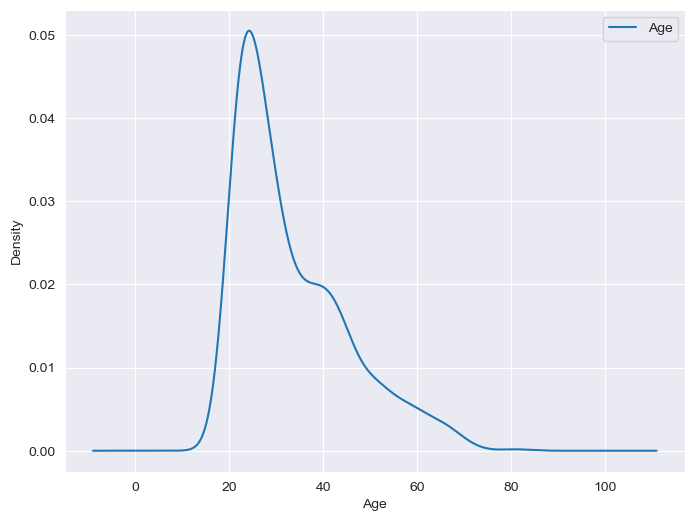

In [821]:
fig = plt.figure()
ax = fig.add_subplot(111)


df['Age'].plot(kind='kde', ax=ax)


lines, label = ax.get_legend_handles_labels()
ax.legend(lines, label, loc='best')
ax.set_xlabel('Age')


Text(0.5, 0, 'Age')

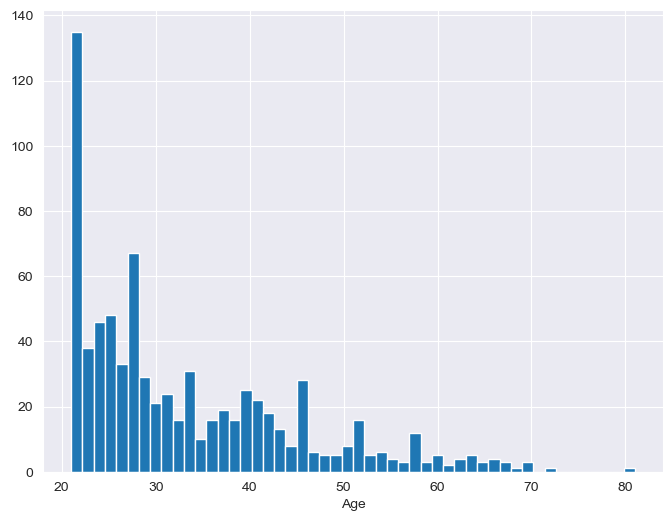

In [822]:
ax = df.Age.hist(bins=50)
ax.set_xlabel('Age')

In [823]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Counting outcomes')

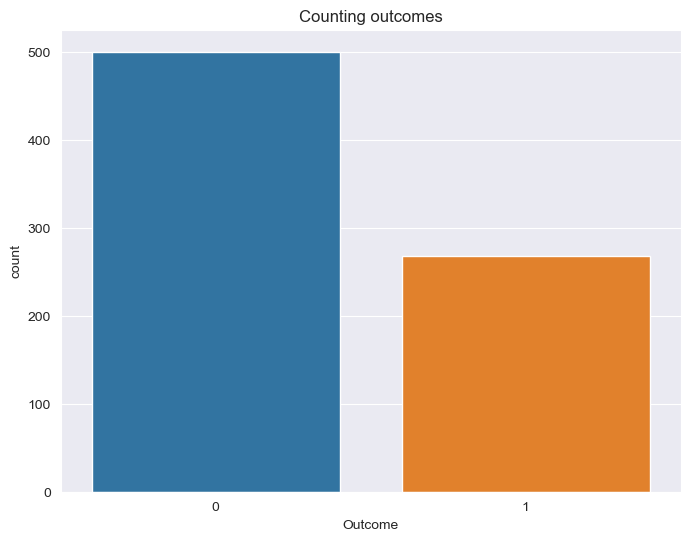

In [824]:
sns.countplot(x = 'Outcome', data=df)
plt.xlabel('Outcome')
plt.title('Counting outcomes')

Check age group with the highest number of diabetic patients

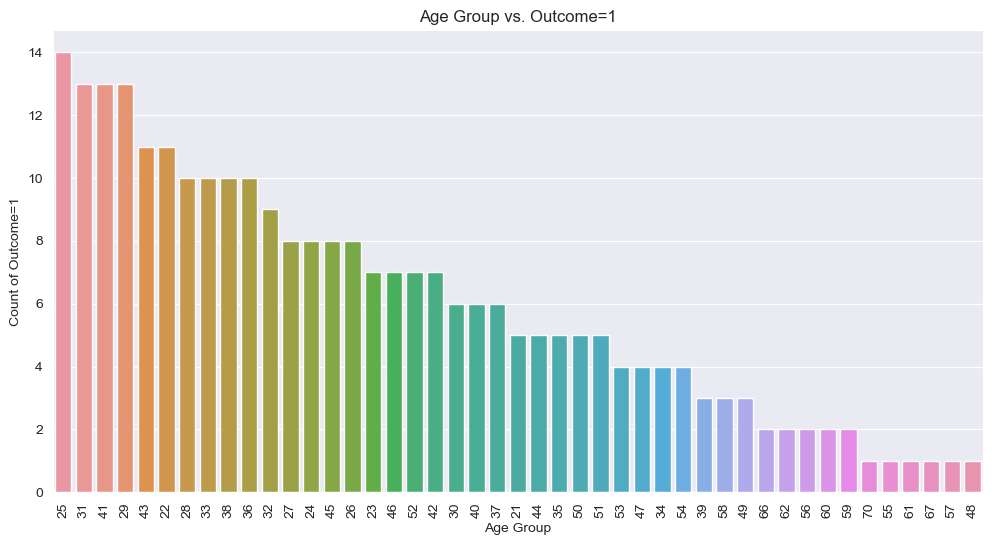

In [825]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=df[df['Outcome'] == 1], order=df[df['Outcome'] == 1]['Age'].value_counts().index)
plt.title('Age Group vs. Outcome=1')
plt.xlabel('Age Group')
plt.ylabel('Count of Outcome=1')
plt.xticks(rotation=90)  
plt.show()


It is evident from the chart above that the highest number of diabetic patients is detected at the age of 25, followed by age 31. This leads to the assumption that individuals in the age group of 25-31 have a higher likelihood of developing diabetes.

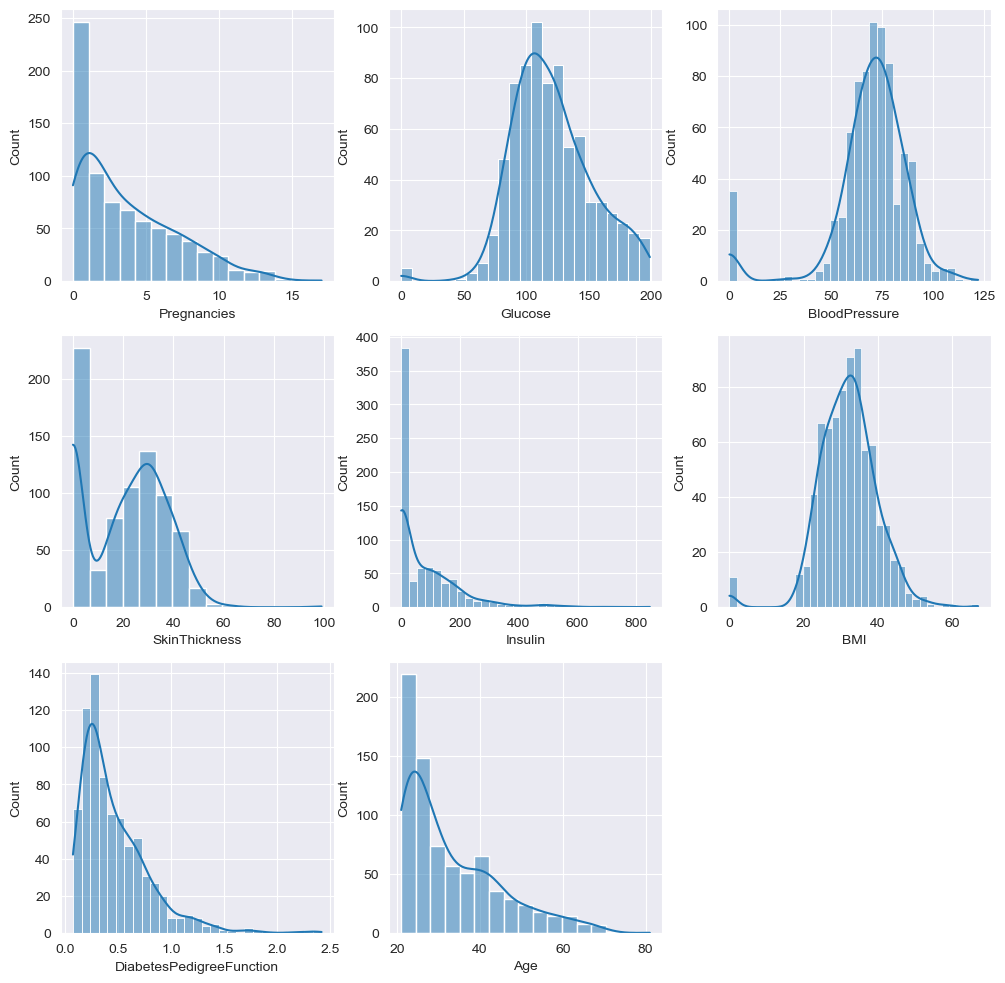

In [826]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x=col, data=df, kde=True)

### Observing Outliers

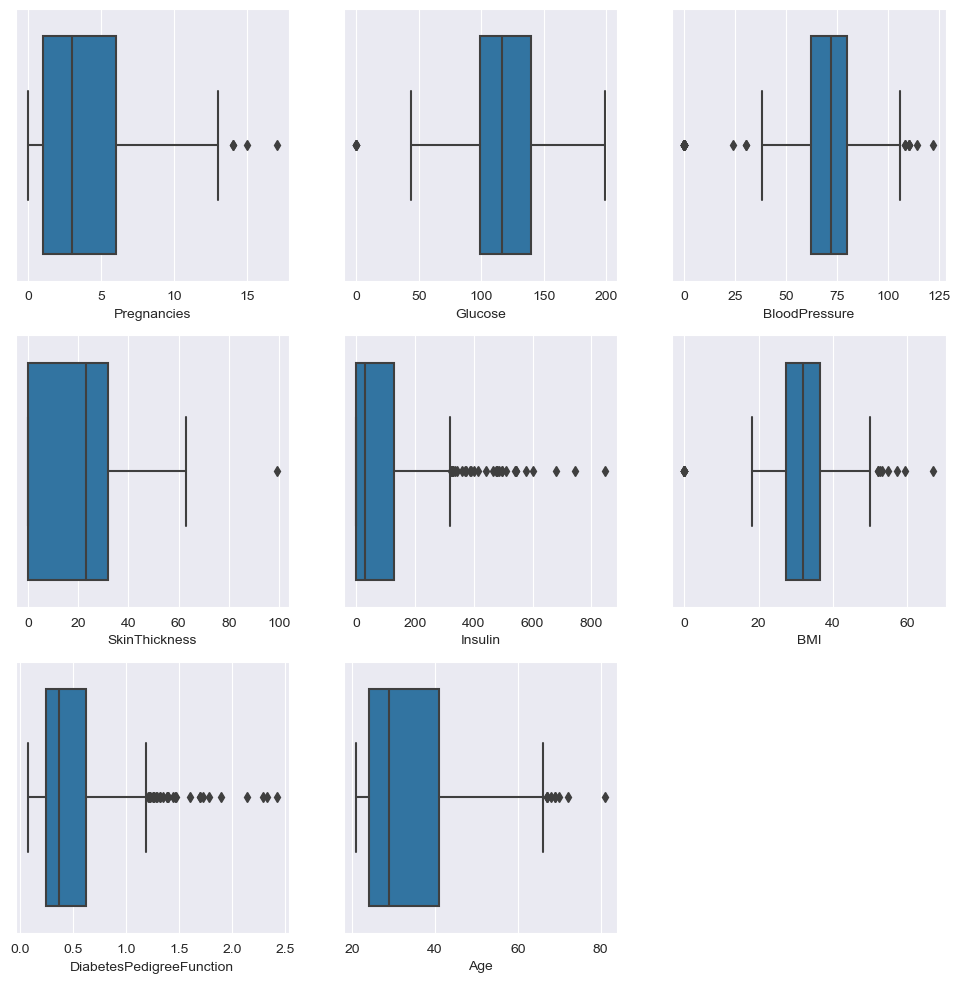

In [827]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=col, data=df)
plt.show()

According to boxplots, there are few outliers

### Addressing outliers in the Age feature

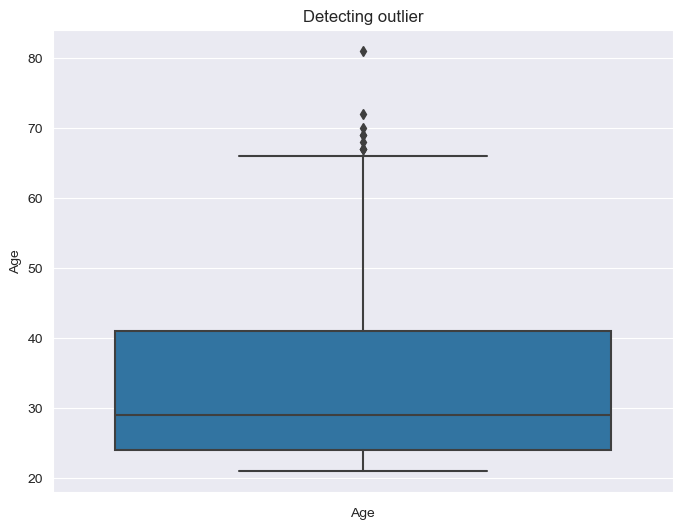

In [828]:
sns.boxplot(y=df['Age'], data=df)
plt.title('Detecting outlier')
plt.xlabel('Age')
plt.show()


### Detecting outliers

In [829]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1-1.5*IQR ) | (df[column] > Q3+1.5*IQR)]
    

In [830]:
outliers = detect_outliers_iqr(df, 'Age')
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


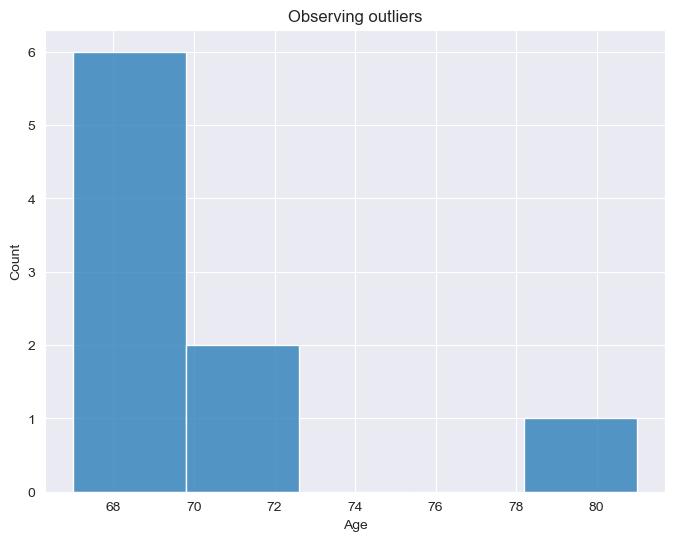

In [831]:
sns.histplot(x='Age', data=outliers)
plt.xlabel('Age')
plt.title('Observing outliers')
plt.show()

### Imputing the outlier

In [832]:
def quantile_based_flooring_and_capping(column):
    """
    In this technique, the outlier is capped at a certain value above 
    the 90th percentile value or floored at a factor below the 10th 
    percentile value. Python code to delete the outlier and copy 
    the rest of the elements to another array
    """

    tenth_percentile = np.percentile(column, 10)
    ninetieth_percentile = np.percentile(column, 90)

    data = np.where(column < tenth_percentile, tenth_percentile, column)
    data = np.where(column > ninetieth_percentile,
                    ninetieth_percentile, column)
    return [int(i) for i in data]


In [833]:
ages = quantile_based_flooring_and_capping(df['Age'].values)
df['Age'] = ages


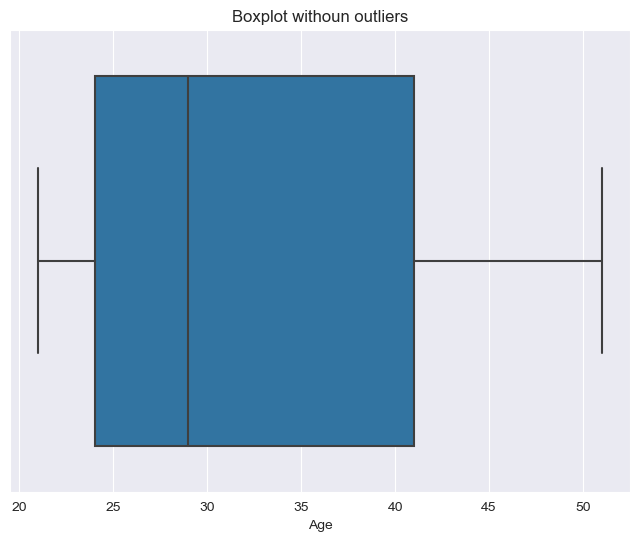

In [834]:
sns.boxplot(x='Age', data=df)
plt.xlabel('Age')
plt.title('Boxplot withoun outliers')
plt.show()

### finding correlation with target feature using pearson correlation

In [835]:
correlation_matrix = df.corr().round(2)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.60,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.27,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.26,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.10,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.08,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.04,0.17
Age,0.60,0.27,0.26,-0.10,-0.04,0.08,0.04,1.00,0.29
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.29,1.00


In [836]:
correlation_matrix.values

array([[ 1.  ,  0.13,  0.14, -0.08, -0.07,  0.02, -0.03,  0.6 ,  0.22],
       [ 0.13,  1.  ,  0.15,  0.06,  0.33,  0.22,  0.14,  0.27,  0.47],
       [ 0.14,  0.15,  1.  ,  0.21,  0.09,  0.28,  0.04,  0.26,  0.07],
       [-0.08,  0.06,  0.21,  1.  ,  0.44,  0.39,  0.18, -0.1 ,  0.07],
       [-0.07,  0.33,  0.09,  0.44,  1.  ,  0.2 ,  0.19, -0.04,  0.13],
       [ 0.02,  0.22,  0.28,  0.39,  0.2 ,  1.  ,  0.14,  0.08,  0.29],
       [-0.03,  0.14,  0.04,  0.18,  0.19,  0.14,  1.  ,  0.04,  0.17],
       [ 0.6 ,  0.27,  0.26, -0.1 , -0.04,  0.08,  0.04,  1.  ,  0.29],
       [ 0.22,  0.47,  0.07,  0.07,  0.13,  0.29,  0.17,  0.29,  1.  ]])

Generating a Heatmap

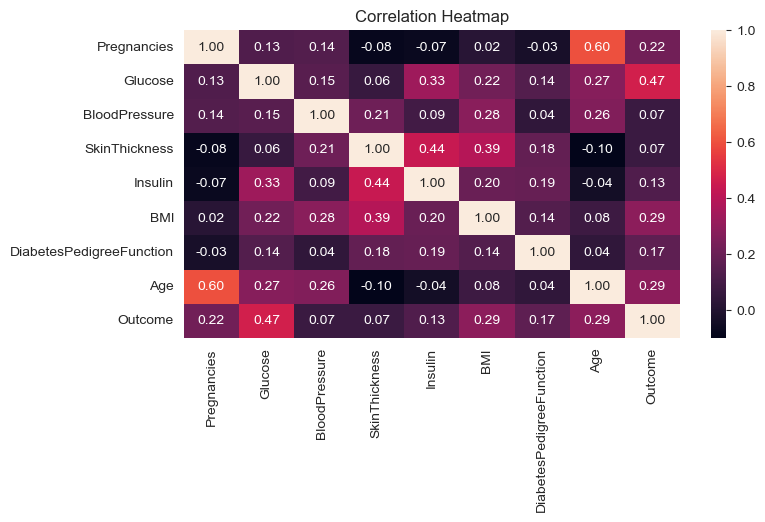

In [837]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Feature Scaling and Splitting dataset
<br />
We will be using 80% of our dataset for training purpose and 20% for testing purpose.

In [838]:
features = df.drop(['Outcome'], axis=1)
target = df.filter(['Outcome'], axis=1)

In [839]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [840]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [841]:
# Divide Data into Training and Test Sets

X_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [846]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(x_test)

### Modeling

In [847]:
# We are going to save the result of each model
model_performance = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])  

In [849]:
print(X_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


### KNN Classifier

In [851]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_predict = knn_classifier.predict(x_test)

In [860]:
# Let make a single prediction
single_record = scaler.transform(features.values[100].reshape(1, -1))
predicted = knn_classifier.predict(single_record)

predicted

array([1])

In [865]:
knn_train_accuracy = accuracy_score(y_train, knn_classifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test))
knn_train_recall = recall_score(y_train, knn_classifier.predict(X_train), average='weighted')
knn_test_recall = recall_score(y_test, knn_classifier.predict(x_test), average='weighted')

In [870]:
print(f'Train accuracy score: {knn_train_accuracy}')
print(f'Test accuracy score: {knn_test_accuracy}')
print(f'Recall train score: {knn_train_recall}')
print(f'Recall test score: {knn_test_recall}')
confusion_matrix(y_test, y_predict)

Train accuracy score: 0.8013029315960912
Test accuracy score: 0.38311688311688313
Recall train score: 0.8013029315960912
Recall test score: 0.38311688311688313


array([[25, 82],
       [13, 34]])

In [873]:
model_performance = model_performance.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)

model_performance

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.801303,0.383117
1,KNN Classifier,0.801303,0.383117


### Logistic Regression

In [884]:
lg_classifier = LogisticRegression(solver='saga', random_state= 0)
lg_classifier.fit(X_train, y_train)
y_pred = lg_classifier.predict(x_test)

In [885]:
# Let make single prediction
single_record = scaler.transform(features.values[100].reshape(1, -1))
predicted = lg_classifier.predict(single_record)
predicted

array([1])

In [890]:
lg_train_recall = recall_score(y_train, lg_classifier.predict(X_train), average='weighted')
lg_test_recall = recall_score(y_test, lg_classifier.predict(x_test), average='weighted')
lg_train_accuracy = accuracy_score(y_train, lg_classifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lg_classifier.predict(x_test))

In [895]:
print(f'Train Recall Score: {lg_train_recall}')
print(f'Test Recall Score: {lg_test_recall}')
print(f'Train Accuracy Score: {lg_train_accuracy}')
print(f'Test Accuracy Score: {lg_test_accuracy}')
confusion_matrix(y_test, y_pred)

Train Recall Score: 0.7638436482084691
Test Recall Score: 0.3051948051948052
Train Accuracy Score: 0.7638436482084691
Test Accuracy Score: 0.3051948051948052


array([[  0, 107],
       [  0,  47]])

In [897]:
model_performance = model_performance.append(pd.Series({'Model': 'Logistic Regression', 'Train Accuracy': lg_train_accuracy, 'Test Accuracy': lg_test_accuracy}), ignore_index=True)
model_performance

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.801303,0.383117
1,KNN Classifier,0.801303,0.383117
2,Logistic Regression,0.763844,0.305195
